# Amazon Alexa Reviews Sentiment Analysis
Dataset: https://www.kaggle.com/sid321axn/amazon-alexa-reviews

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
data.shape

(3150, 5)

In [5]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

The dataset’s 'rating' column contains the ratings given by the users of Amazon Alexa on a scale of 1 to 5, where 5 is the best rating a user can give.

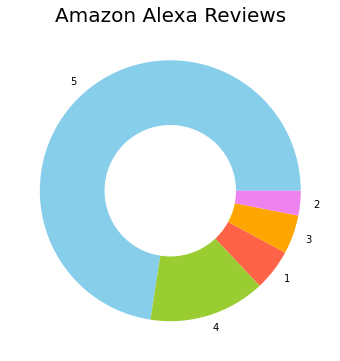

In [7]:
ratings = data['rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

colors = ['skyblue', 'yellowgreen', 'tomato', 'orange', 'violet']
plt.figure(figsize=(6,6))
plt.pie(quantity, labels=numbers, colors=colors)
central_circle = plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Amazon Alexa Reviews', size=20)
plt.show()

From the above figure, we can see that most of the customers have rated Amazon Alexa including all its variants as 5. So we can say that most of the customers are happy with Amazon Alexa.

### Sentiment Analysis

In [8]:
sentiments = SentimentIntensityAnalyzer()
data['positive']=[sentiments.polarity_scores(i)["pos"] for i in data['verified_reviews']]
data['negative']=[sentiments.polarity_scores(i)["neg"] for i in data['verified_reviews']]
data['neutral']=[sentiments.polarity_scores(i)["neu"] for i in data['verified_reviews']]
data.head()

,rating,date,variation,verified_reviews,feedback,positive,negative,neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000


In [9]:
# calculating the sum of sentiment scores for each column to understand what most of the customers think about Amazon Alexa
x=sum(data['positive'])
y=sum(data['negative'])
z=sum(data['neutral'])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print('Positive 😊')
    elif b>a and b>c :
        print('Negative 😡')
    else:
        print('Neutal 🙂')

sentiment_score(x,y,z)

Neutal 🙂


In [10]:
print('Positive',x)
print('Negative',y)
print('Neutral',z)

Positive 1035.4579999999983
Negative 96.79999999999995
Neutral 1936.740999999996
